## Project: Word Tokenize + Text-To-Speech

In this project, we will implement simple Text-to-Speech with standard libraries

Import the libraries

In [68]:
import nltk
from nltk.tokenize import word_tokenize
import underthesea
from langdetect import detect
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play
import librosa  # Install this with pip install librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [69]:
text = input("Enter any text: ")

In [70]:
if detect(text) == 'vi':
    tokens = underthesea.word_tokenize(text)
else:
    tokens = word_tokenize(text)
print(tokens)

['Đây', 'là', 'bài tập', 'về', 'chuyển đổi', 'văn bản', 'thành', 'âm thanh', 'sử dụng', 'thư viện', 'Python', 'có', 'sẵn']


In [71]:
# Generate speech
export_path = "output.mp3"
tts = gTTS(text=text, lang=detect(text))
tts.save(export_path)
sound = AudioSegment.from_mp3(export_path)

In [72]:
y, sr = librosa.load(export_path, sr=None)

print(f"Sample Rate: {sr} \nAudio Data Shape: {len(y)}")
print(f"Bits per sample: 16")
print(f"Duration: {len(y)/sr} seconds")

# Get the Max and Min Amplitude
print(f"Max Amplitude: {max(y)}")
print(f"Min Amplitude: {min(y)}")

Sample Rate: 24000 
Audio Data Shape: 145152
Bits per sample: 16
Duration: 6.048 seconds
Max Amplitude: 0.5256912112236023
Min Amplitude: -0.5068296194076538


Draw a waveform

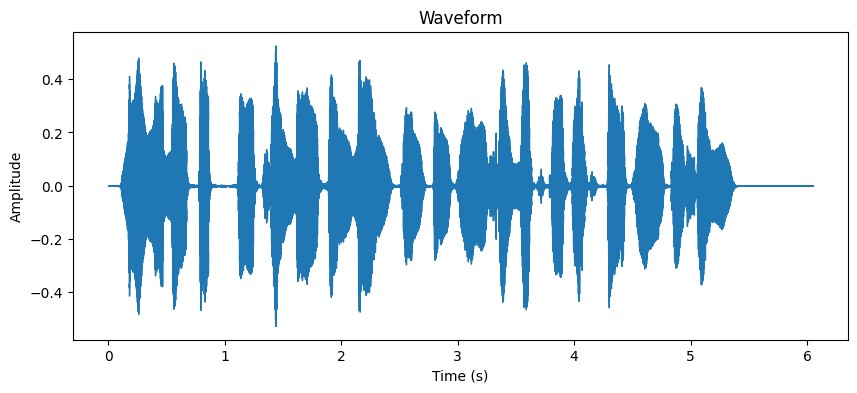

In [73]:
# Plot the waveform
plt.figure(figsize=(10,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Draw Mel-Spectrogram

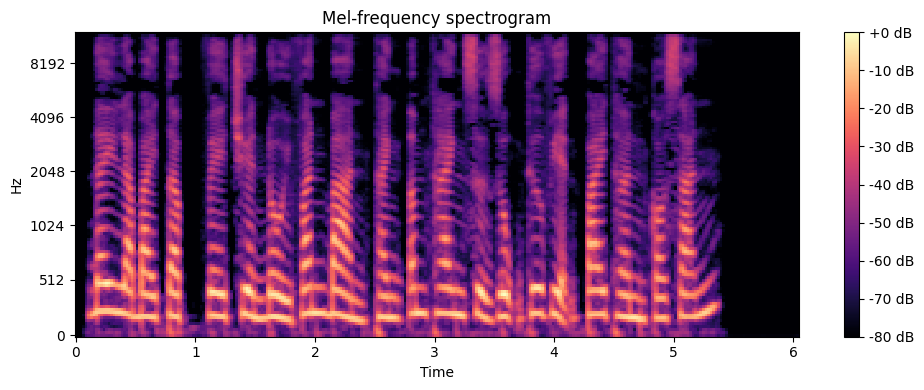

In [74]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

F0: [          nan           nan           nan  214.97519306  197.13312122
  199.42369775  205.26725814  227.75828325  229.07767356  229.07767356
  230.40470702  230.40470702  230.40470702  230.40470702  229.07767356
  227.75828325  222.55627687  217.47308448  213.73702705  205.26725814
  199.42369775  195.99771799  192.63059451  188.23090565  181.81906999
  186.0688893   183.93170582  183.93170582  182.87233715  179.73069986
  176.64303401  174.61411572  174.61411572  172.60850154           nan
  216.22053168  194.8688542   188.23090565  186.0688893   184.99721136
  182.87233715  179.73069986  173.60841241           nan           nan
           nan           nan           nan           nan           nan
           nan  193.74649219  192.63059451  191.52112393  190.41804342
  189.32131619  186.0688893   184.99721136  182.87233715  181.81906999
  177.6663167            nan           nan           nan  205.26725814
  205.26725814  201.74088951  199.42369775  198.27510177  194.8688542
  1

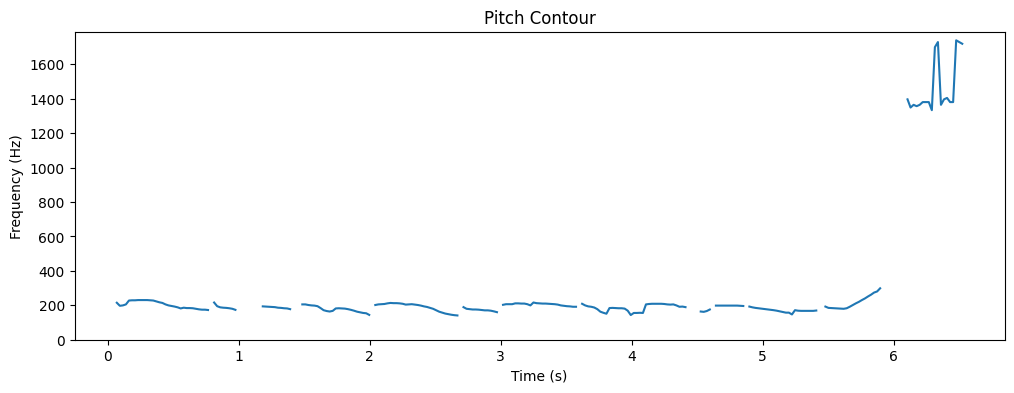

In [75]:
f0, voiced_flag, voiced_prob = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
print("F0:", f0)
print("Voiced Flag:", f0)
print("Voiced Prob:", f0)

plt.figure(figsize=(12, 4))
times = librosa.times_like(f0)
plt.plot(times, f0, label='Pitch (Hz)')
plt.title('Pitch Contour')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, np.nanmax(f0)+50)
plt.show()